In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex2.python.libs import *


In [3]:
mpl.rcParams['figure.dpi'] = 150

# Load Data

In [4]:
data = np.loadtxt('../../data/ex2data1.txt', delimiter=',', usecols=(0, 1, 2))
X = data[:, :2]
y = data[:, 2]

# Plotting

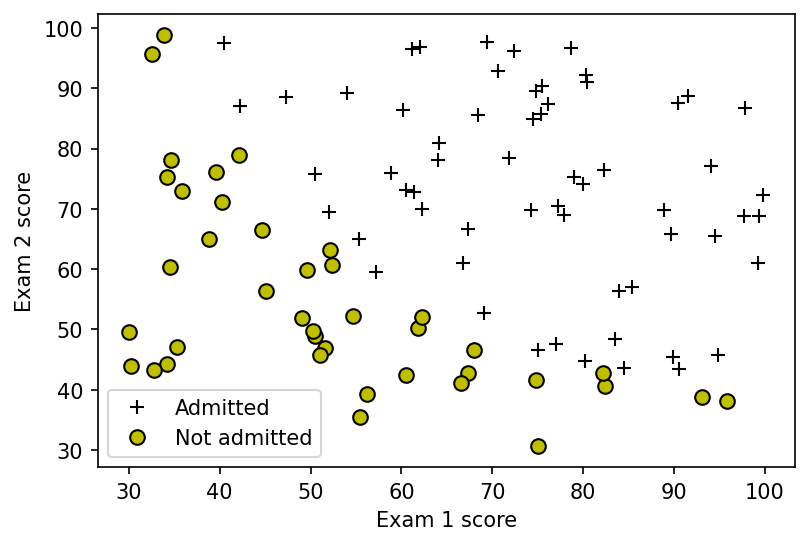

In [5]:
ax = plot_data(X, y)
ax.set(
    xlabel='Exam 1 score',
    ylabel='Exam 2 score',
)
ax.legend(['Admitted', 'Not admitted'])

# Sigmoid function
$$
h_\theta(x) = g(\theta^Tx)
$$
$$
g(z) = \frac{1}{1 + e^{-z}}
$$

# Cost function and Gradiant
$$
J(\theta) = -\frac{1}{m}\left[\sum^m_{i=1} y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))\right]
$$

$$
\frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

In [6]:
m, n = X.shape
X = np.c_[(np.ones((m, 1)), X)]
initial_theta = np.zeros(n+1)

In [7]:
cost = cost_function(initial_theta, X, y)
grad = gradiant_function(initial_theta, X, y)

In [8]:
print(f'''\
Cost at initial theta(zeros): {cost}
Gradient at initial theta(zeros):
{grad}
''')

Cost at initial theta(zeros): 0.6931471805599452
Gradient at initial theta(zeros):
[ -0.1        -12.00921659 -11.26284221]



# optimizing using fminunc

```octave
% this similar to lambda function in other languages
@(t)(costFunction(t, X, y))
```

In [9]:
thetas = fmin_bfgs(cost_function, initial_theta, gradiant_function, args=(X, y), maxiter=400, disp=True)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


/Users/jchien/workspace/courses/coursera_ml/ex2/python/libs/functions.py:80: RuntimeWarning: divide by zero encountered in log
  J = (y.dot(np.log(g)) + (1 - y).dot(np.log(1 - g))) * -1 / m


In [10]:
print(f'''thetas
{thetas}
''')

thetas
[-25.16133284   0.2062317    0.2014716 ]



# Decision boundary, line

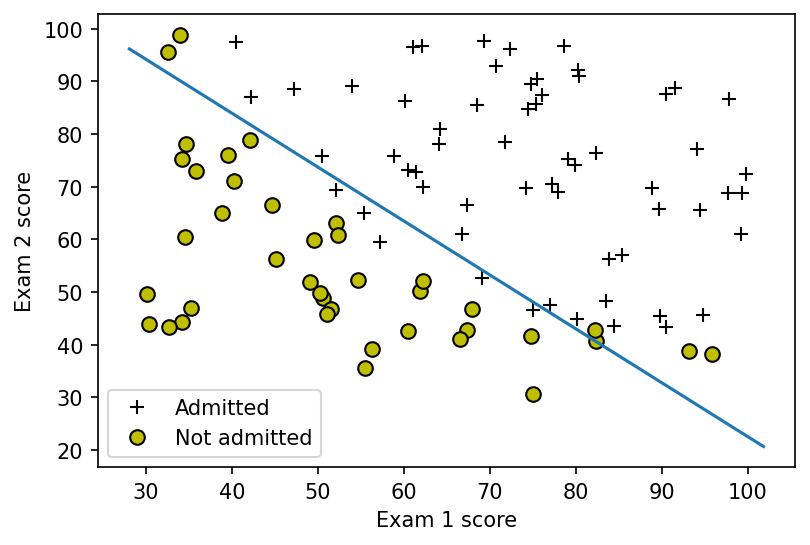

In [11]:
ax = plot_decision_boundary(thetas, X, y)
ax.legend(['Admitted', 'Not admitted'])
ax.set(
    xlabel='Exam 1 score',
    ylabel='Exam 2 score',
);

# predict and accuracies

In [13]:
prob = sigmoid(np.array([1, 45, 85] @ thetas.T))
print(f'for a student with scores 45 and 85, we predict an admission probability of {prob*100}')
p = predict(thetas, X)
print(f'Train Accuracy: {(p==y).mean() * 100}')

for a student with scores 45 and 85, we predict an admission probability of 77.62907240588949
Train Accuracy: 89.0


# Part 2 Regularized logistic regression

# Load Data

In [21]:
data = np.loadtxt('../../data/ex2data2.txt', delimiter=',', usecols=(0, 1, 2))
X = data[:, :2]
y = data[:, 2]

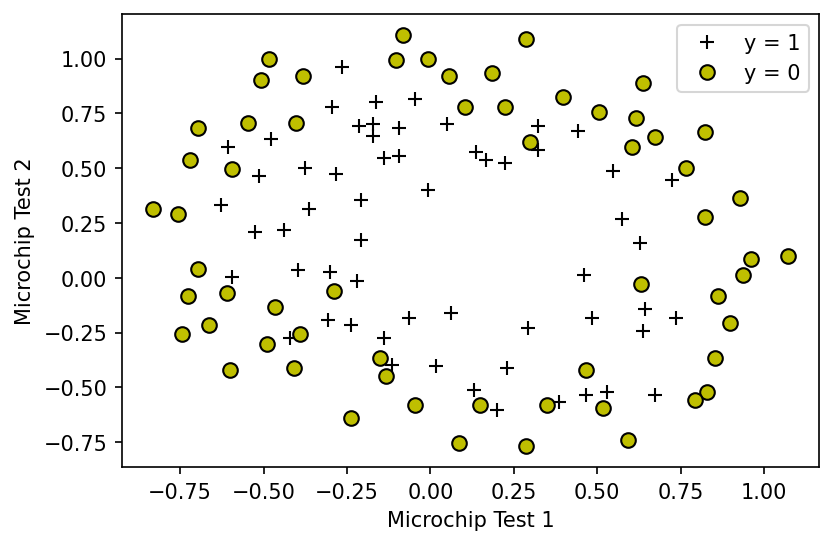

In [16]:
ax = plot_data(X, y)
ax.set(
    xlabel='Microchip Test 1',
    ylabel='Microchip Test 2',
)
ax.legend(['y = 1', 'y = 0']);

# Regularized logistic regression

In [22]:
X = map_features(X[:, 0], X[:, 1])
initial_theta = np.zeros(X.shape[1])
la = 1

In [24]:
cost = cost_function_reg(initial_theta, X, y, la)
grad = gradiant_function_reg(initial_theta, X, y, la)

In [25]:
print(f'''Cost at initial theta (zeros): {cost}
grad: {grad}
''')

Cost at initial theta (zeros): 0.693147180559945
grad: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]



# Regularization and accuracies

In [73]:
initial_theta = np.zeros(X.shape[1])
la = 1

In [74]:
theta = fmin_bfgs(cost_function_reg, initial_theta, gradiant_function_reg, args=(X, y, la), maxiter=400, disp=True)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


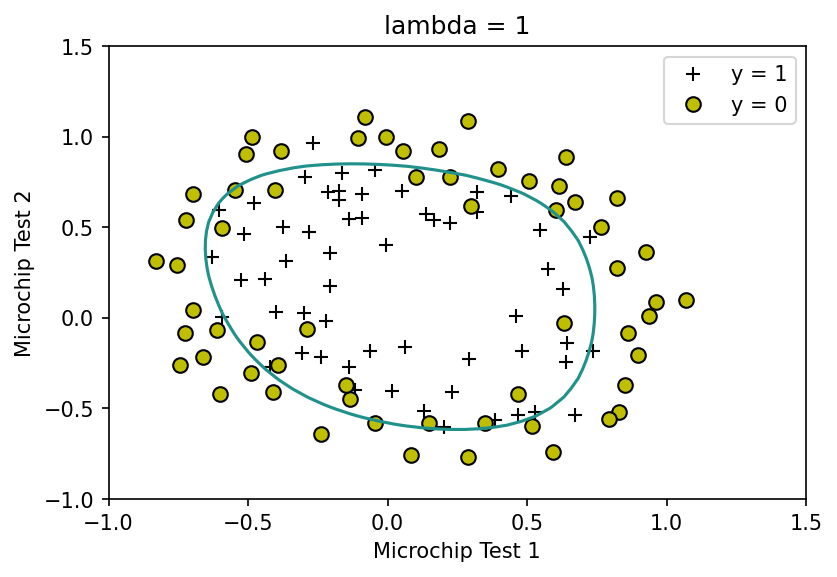

In [75]:
ax = plot_decision_boundary2(theta, X, y)
ax.set(
    xlabel='Microchip Test 1',
    ylabel='Microchip Test 2',
    title=f'lambda = {la}'
)
ax.legend(['y = 1', 'y = 0', 'Decision boundary']);

In [76]:
p = predict(theta, X)
print(f'Train Accuracy: {(p==y).mean() * 100}')

Train Accuracy: 83.05084745762711
